In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math 
import time

In [3]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [4]:
img = mpimg.imread('joconde.jpg')  

In [5]:
gray = rgb2gray(img)

In [6]:
gray_tmp = np.copy(gray)

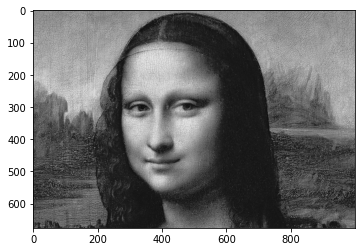

In [7]:
plt.imshow(gray, cmap=plt.get_cmap('gray'))
plt.show()

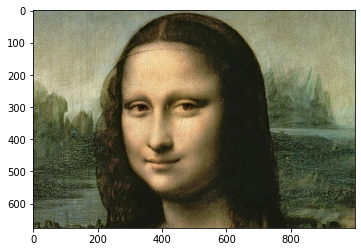

In [8]:
plt.imshow(img)
plt.show()

In [9]:
def crop_image_circle(image,center,radius):
    gray_tmp = np.copy(gray)
    for i in range(gray_tmp.shape[0]):
        for j in range(gray_tmp.shape[1]):
            distance_2 = math.sqrt(pow(center[0]-i,2) + pow(center[1]-j,2))
            if distance_2 > radius:
                gray_tmp[i][j] = 255
    return gray_tmp

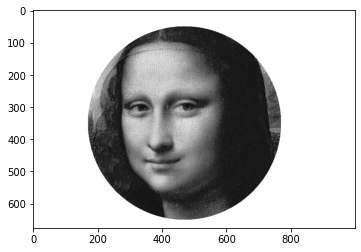

In [10]:
center = [350,470]
radius = 300
gray_crop = crop_image_circle(gray,center,radius)
plt.imshow(gray_crop, cmap=plt.get_cmap('gray'))
plt.show()

In [11]:
def generate_nail_positions(center, radius, number):
    x = [center[0] + radius*math.cos(n*2*math.pi/number) for n in range(number)]
    y = [center[1] + radius*math.sin(n*2*math.pi/number) for n in range(number)]
    res = {}
    for i in range(number):
        res[i] = [int(x[i]),int(y[i])]
    return res

In [11]:
generate_nail_positions(center,radius,10)

{0: [650, 470],
 1: [592, 646],
 2: [442, 755],
 3: [257, 755],
 4: [107, 646],
 5: [50, 470],
 6: [107, 293],
 7: [257, 184],
 8: [442, 184],
 9: [592, 293]}

In [12]:
gray_tmp = np.copy(gray)

In [12]:
def distance_point_line(point,line):
    point1 = line[0]
    point2 = line[1]
    if (abs(point2[0]-point1[0])>0.0001):
        delta = (point2[1]-point1[1]) / (point2[0]-point1[0])
        a = -delta
        b = 1
        c = point1[0]*delta-point1[1]
        distance = abs(a*point[0]+b*point[1]+c)/math.sqrt(pow(a,2)+pow(b,2))
    else:
        # vertical line
        distance = abs(point[0]-point1[0])
    return distance

In [13]:
def add_line(line, image):
    max_x = max(line[0][0],line[1][0])
    max_y = max(line[0][1],line[1][1])
    min_x = min(line[0][0],line[1][0])
    min_y = min(line[0][1],line[1][1])
    tmp = np.copy(image)
    for i in range(tmp.shape[0]):
        for j in range(tmp.shape[1]):
            if i > max_x + 0.5:
                continue
            if j > max_y + 0.5:
                continue
            if i < min_x - 0.5:
                continue
            if j < min_y - 0.5:
                continue
            distance = distance_point_line([i,j],line)
            if distance < 0.5:
                tmp[i][j] = 0.1*min(255,image[i][j])
    return tmp
                

In [14]:
def generate_line_matrix(line,image):
    line_matrix = np.ones(shape=(image.shape[0],image.shape[1]))
    max_x = max(line[0][0],line[1][0])
    max_y = max(line[0][1],line[1][1])
    min_x = min(line[0][0],line[1][0])
    min_y = min(line[0][1],line[1][1])
    for i in range(line_matrix.shape[0]):
        for j in range(line_matrix.shape[1]):
            if i > max_x + 0.5:
                continue
            if j > max_y + 0.5:
                continue
            if i < min_x - 0.5:
                continue
            if j < min_y - 0.5:
                continue
            distance = distance_point_line([i,j],line)
            if distance < 0.5:
                line_matrix[i][j] = 0.01;
    return line_matrix

In [15]:
[i for i in range(5,8+1)]

[5, 6, 7, 8]

In [16]:
def generate_line_matrix2(line,image):
    line_matrix = np.ones(shape=(image.shape[0],image.shape[1]))
    point1 = line[0]
    point2 = line[1]
    if abs(point2[0]-point1[0]) > 0.001:
        a = (point2[1]-point1[1])/(point2[0]-point1[0])
        b = point1[1]-a*point1[0]
        x = [i for i in range(min(point1[0],point2[0]),max(point1[0],point2[0])+1)]
        y = [round(a*i+b) for i in x]
        for x_ in x:
            y_ = round(a*x_+b)
            line_matrix[x_][y_] = 0.1
    else:
        if abs(point2[1]-point1[1]) < 0.001:
            print('none')
            return None
        y = [i for i in range(min(point1[1],point2[1]),max(point1[1],point2[1])+1)]
        for y_ in y:
            line_matrix[point1[0]][y_] = 0.1        
    return line_matrix

In [18]:
line=[[500,600],[70,150]]

In [19]:
generate_line_matrix(line,gray)

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [20]:
generate_line_matrix(line,gray)

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [21]:
start_time = time.time()
for i in range(10):
    generate_line_matrix(line,gray)
print("--- %s seconds ---" % (time.time() - start_time))

--- 13.865161180496216 seconds ---


In [22]:
start_time = time.time()
for i in range(10):
    generate_line_matrix2(line,gray)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.03147768974304199 seconds ---


In [ ]:
12.5/0.02

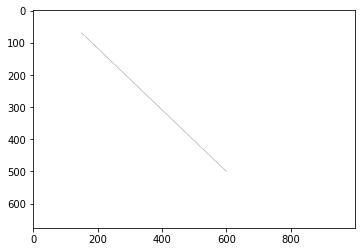

In [23]:
plt.imshow(generate_line_matrix2(line,gray), cmap=plt.get_cmap('gray'))
plt.show()

In [17]:
def add_line2(current_idx,next_idx, nail_positions, image, line_dict):
    a = min(current_idx,next_idx)
    b = max(current_idx,next_idx)
    key = str(a)+'_'+str(b)
    if key not in line_dict.keys():
        line = [nail_positions[current_idx],nail_positions[next_idx]]
        line_dict[key] = generate_line_matrix(line,image)
    return np.multiply(image,line_dict[key])

In [18]:
def add_line3(current_idx,next_idx, nail_positions, image, line_dict):
    a = min(current_idx,next_idx)
    b = max(current_idx,next_idx)
    key = str(a)+'_'+str(b)
    if key not in line_dict.keys():
        line = [nail_positions[current_idx],nail_positions[next_idx]]
        line_dict[key] = generate_line_matrix2(line,image)
    return np.multiply(image,line_dict[key])

In [19]:
def complete_line_dic(current_idx,nail_positions,line_dict,image):
    for next_idx in nail_positions.keys():
        a = min(current_idx,next_idx)
        b = max(current_idx,next_idx)
        key = str(a)+'_'+str(b)
        if (current_idx!=next_idx) and (key not in line_dict.keys()):
            line = [nail_positions[current_idx],nail_positions[next_idx]]
            line_dict[key] = generate_line_matrix2(line,image)
            print(key+' done')

In [ ]:
center = [350,470]
radius = 300
number = 100
current_idx = 0
threshold = 10
res = 255*np.ones(shape=(gray.shape[0],gray.shape[1]))
line_dict = {}
nail_positions = generate_nail_positions(center, radius, number)

In [ ]:
complete_line_dic(3,nail_positions,line_dict,gray)

In [ ]:
for i in range(1,10):
    print(i)
    complete_line_dic(i,nail_positions,line_dict,gray)

In [20]:
def distance_image(image1, image2):
    return np.linalg.norm(image1-image2)

In [21]:
def possible_next_nails(idx, nail_positions, threshold = 10):
    if ((idx>=threshold) and (idx+threshold<len(nail_positions))):
        left = nail_positions[:idx-threshold]
        right = nail_positions[idx+threshold+1:]
        result = left + right
    elif (idx<=threshold):
        result = nail_positions[idx+threshold+1:len(nail_positions)-threshold+idx]
    elif (idx>=len(nail_positions)-threshold):
        result = nail_positions[threshold:idx-threshold]
    return result        

In [22]:
def possible_next_nails2(idx, nail_number, threshold = 10):
    # 0 <= idx <= nail_number-1
    if (idx>=nail_number):
        print('pb')
        return []
    if ((idx>=threshold) and (idx+threshold<nail_number)):
        left = [i for i in range(1,idx-threshold)]
        right = [i for i in range(idx+threshold+1,nail_number)]
        result = left + right
    elif (idx<=threshold):
        result = [i for i in range(idx+threshold+1,nail_number-threshold+idx)]
    elif (idx>=nail_number-threshold):
        result = [i for i in range(threshold,idx-threshold)]
    return result   

In [ ]:
possible_next_nails2(0, nail_number,10)

In [ ]:
import time
start_time = time.time()
print("toto")
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
possible_next_nails2(0, len(nail_positions),threshold)

In [ ]:
len(nail_positions)

In [ ]:
plt.imshow(res, cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
center = [350,470]
radius = 30
number = 30
current_idx = 0
res = 255*np.ones(shape=(gray.shape[0],gray.shape[1]))

In [ ]:
plt.imshow(res, cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
center = [350,470]
radius = 300
number = 200
current_idx = 0
threshold = 2
res = 255*np.ones(shape=(gray.shape[0],gray.shape[1]))
nail_positions = generate_nail_positions(center, radius, number)
line_dict = {}

In [ ]:
#complete_line_dic(0,nail_positions,line_dict,gray)

In [ ]:
for n in range(3):
    print(n)
    m = math.inf
    possible_next_ways = possible_next_nails2(current_idx, len(nail_positions),threshold)
    start_time = time.time()
    for i in possible_next_ways:     
        #print('  '+str(i))
        tmp_res = add_line3(current_idx,i,nail_positions,res,line_dict)        
        #start_time = time.time()
        tmp_m = distance_image(tmp_res,gray_crop)
        #print("--- distance_image %s seconds ---" % (time.time() - start_time))        
        if tmp_m < m:
            m = tmp_m
            min_res = tmp_res
            next_position = i
    res = min_res
    print("--- add_line2 %s seconds ---" % (time.time() - start_time))
    print("distance: "+str(m))
    #plt.imshow(res, cmap=plt.get_cmap('gray'))
    #plt.show()
    
    current_idx = next_position
plt.imshow(res, cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
possible_next_nails2(0, 20,threshold)

In [ ]:
[i for i in range(0+10+1,20-10+0)]

In [23]:
def possible_next_nails2(idx, nail_number, threshold = 10):
    # 0 <= idx <= nail_number-1
    if (idx>=nail_number):
        print('pb')
        return []
    if ((idx>=threshold) and (idx+threshold<nail_number)):
        left = [i for i in range(1,idx-threshold)]
        right = [i for i in range(idx+threshold+1,nail_number)]
        result = left + right
    elif (idx<=threshold):
        result = [i for i in range(idx+threshold+1,nail_number-threshold+idx)]
    elif (idx>=nail_number-threshold):
        result = [i for i in range(threshold,idx-threshold)]
    return result  

In [ ]:
plt.imshow(gray_crop, cmap=plt.get_cmap('gray'))
plt.show()

In [27]:
center = [350,470]
radius = 300
number = 50
current_idx = 0
threshold = 2
res = 255*np.ones(shape=(gray.shape[0],gray.shape[1]))
line_dict = {}
nail_positions = generate_nail_positions(center, radius, number)

In [ ]:
for n in range(100):
    print(n)
    m = math.inf
    possible_next_ways = possible_next_nails2(current_idx, len(nail_positions),threshold)
    #start_time = time.time()
    for i in possible_next_ways:     
        tmp_res = add_line3(current_idx,i,nail_positions,res,line_dict)        
        tmp_m = distance_image(tmp_res,gray_crop)
        if tmp_m < m:
            m = tmp_m
            min_res = tmp_res
            next_position = i
    res = min_res
    current_idx = next_position
    #print("--- add_line2 %s seconds ---" % (time.time() - start_time))
    print("distance: "+str(m))

0
distance: 96706.9974539396
1
distance: 96577.1857757331
2
distance: 96435.99260528898
3
distance: 96298.59836264391
4
distance: 96166.3014396539
5
distance: 96028.98943771262
6
distance: 95896.80100850751
7
distance: 95765.45224793856
8
distance: 95630.98152395176
9
distance: 95505.33880690292
10
distance: 95380.84638332482
11
distance: 95253.84333778305
12
distance: 95128.72425224625
13
distance: 95006.74902988905
14
distance: 94883.32632372978
15
distance: 94764.32597840826
16


In [38]:
current_idx

113

In [40]:
nail_positions[0]

[650, 470]

In [39]:
nail_positions[113]

[135, 679]

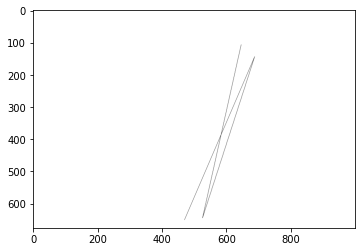

In [26]:
plt.imshow(res, cmap=plt.get_cmap('gray'))
plt.show()